In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
The datasets are publicly available in [this](https://drive.google.com/drive/folders/1u6FyVqBlF7_meVR33mXUhpzp2SNPR5Xg?usp=sharing) folder with the id used below.

In [ ]:
!gdown --folder 1u6FyVqBlF7_meVR33mXUhpzp2SNPR5Xg &> /dev/null

In [ ]:
!ls ./datasets

annual_cpi   cpi_factors    gdp        monthly_cpi
cpi_changes  exchange_rate  liquidity  seasonal_mxp


In [ ]:
seasonal_mxp_df = pd.read_csv("datasets/seasonal_mxp/seasonal_mxp.csv")
liquidity_df = pd.read_csv("datasets/liquidity/liquidity.csv")
gdp_df = pd.read_csv("datasets/gdp/gdp.csv")
exchange_rate_df = pd.read_csv("datasets/exchange_rate/exchange_rate.csv")
monthly_cpi_df = pd.read_csv("datasets/monthly_cpi/monthly_cpi.csv")
annual_cpi_df = pd.read_csv("datasets/annual_cpi/annual_cpi.csv")

# Datasets Summary
*   **Seasonal MXP** Seasonal, 1391-1400
*   **Liquidity** Annual, 1344-1400
*   **GDP** Annual, 1341-1400
*   **Exchange Rate** Monthly, 01/1371-05/1401
*   **Monthly CPI** Monthly, 01/1361-04/1401
*   **Annual CPI** Annual, 1315-1400 


In [ ]:
seasonal_mxp_df.head(3)

,season,MXP
0,1/1/1391,25.7
1,4/1/1391,28.1
2,7/1/1391,32.5


In [ ]:
liquidity_df.head(3)

,year,liquidity
0,1344,105.6
1,1345,120.8
2,1346,144.3


In [ ]:
gdp_df.head(3)

,year,GDP,GDP growth
0,1341,1165380,10.25
1,1342,1263310,8.40
2,1343,1404074,11.14


In [ ]:
exchange_rate_df.head(3)

,date,USD
0,01/01/1371,1439.000000
1,02/01/1371,1447.880000
2,03/01/1371,1440.043478


In [ ]:
monthly_cpi_df.head(3)

,date,monthly CPI
0,1/1/1361,0.3
1,2/1/1361,0.2
2,3/1/1361,0.2


In [ ]:
annual_cpi_df.head(3)

,year,annual CPI
0,1315,0.0041
1,1316,0.0041
2,1317,0.0041


# Datesets Plot

In [ ]:
def plot_time_series(y, x, title, ylabel, xlabel, ax=None, step=1, c='b'):
  if not ax:
    fig, ax = plt.subplots(1, figsize=(18, 4))

  lenght = len(y)
  ax.plot(np.arange(lenght), y, c=c)
  ax.set_xticks(np.arange(lenght, step=step))
  ax.set_xticklabels(map(str, x.take(np.arange(lenght, step=step))), rotation=60)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)

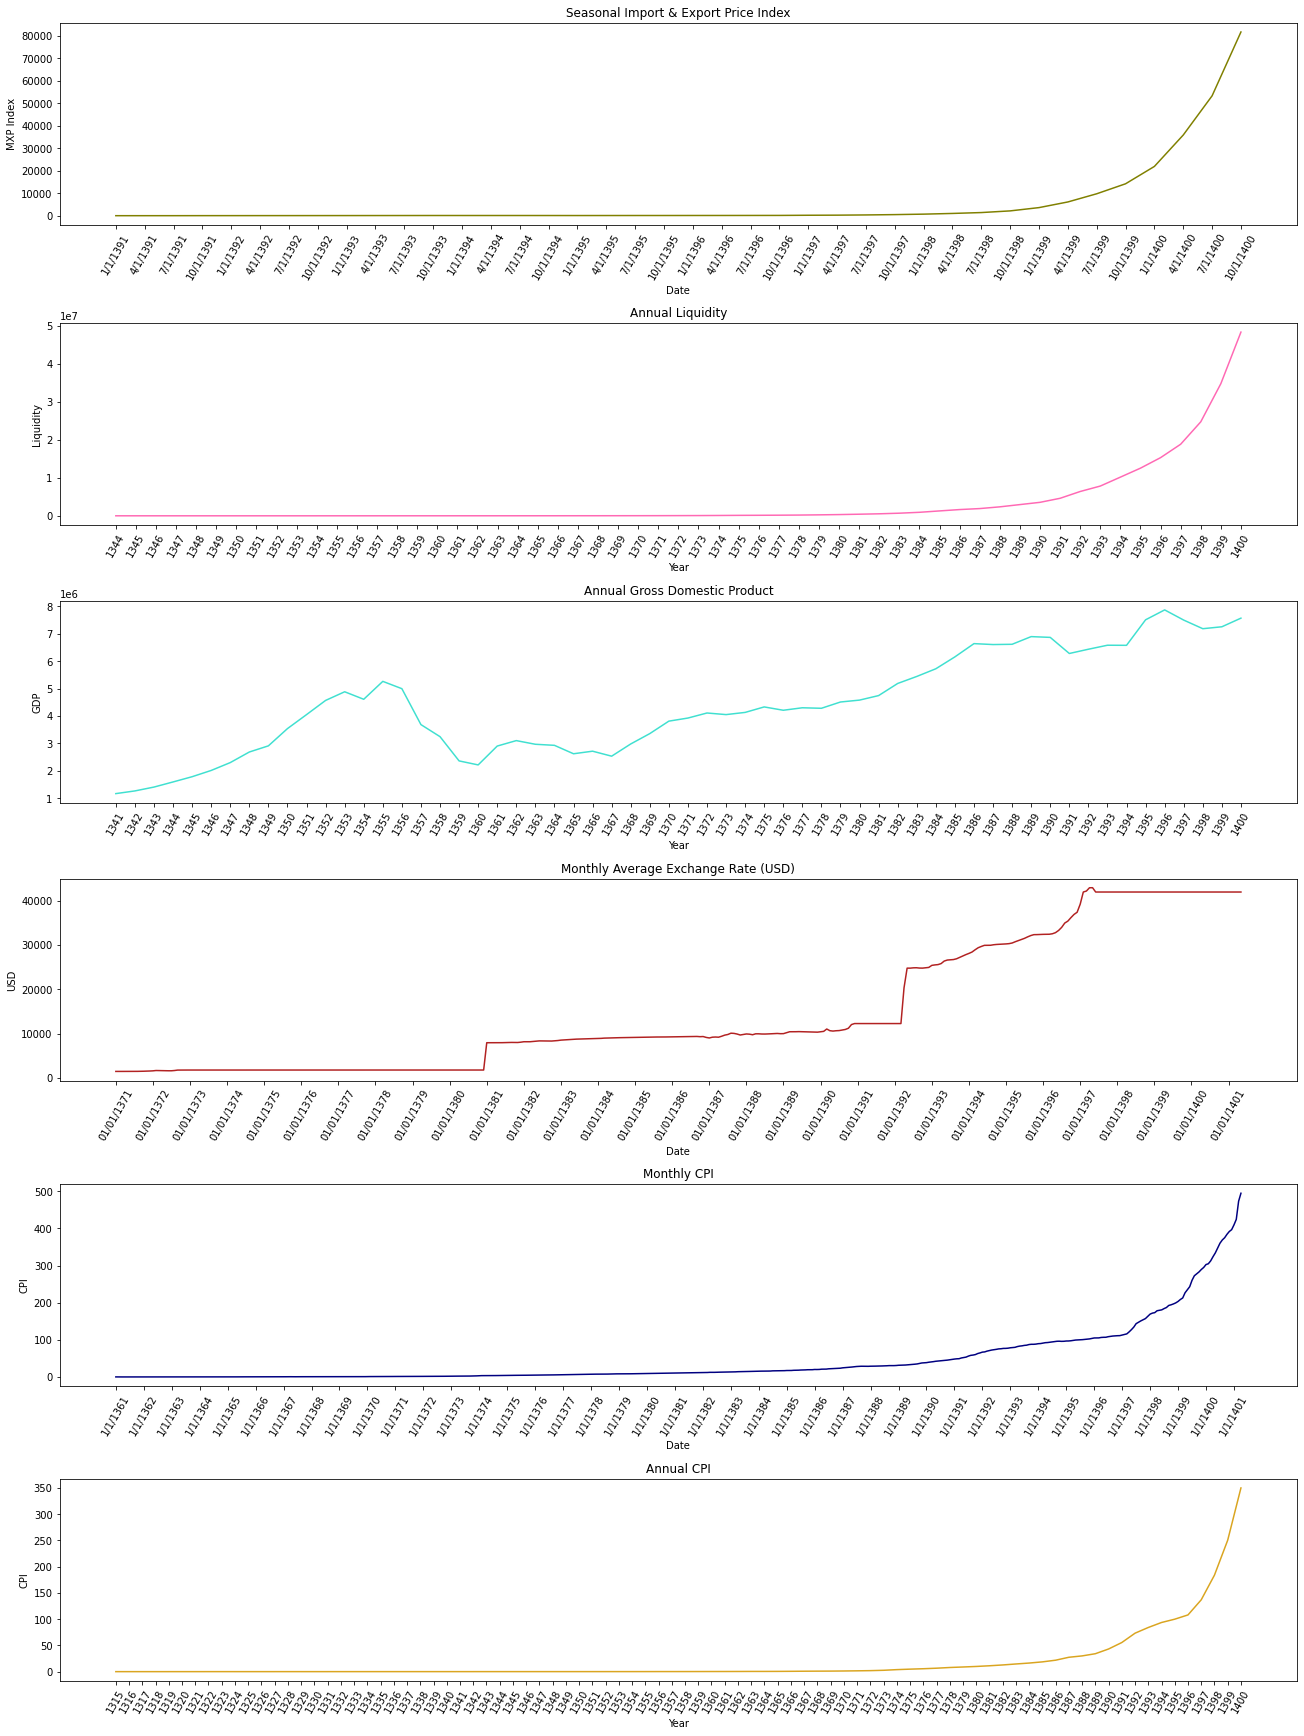

In [ ]:
fig, axs = plt.subplots(6, 1, figsize=(18, 24), constrained_layout=True)

# MXP 
plot_time_series(
    seasonal_mxp_df["MXP"],
    seasonal_mxp_df["season"],
    "Seasonal Import & Export Price Index",
    "MXP Index",
    "Date",
    ax=axs[0],
    c='olive',
)

# Liquidity
plot_time_series(
    liquidity_df["liquidity"],
    liquidity_df["year"],
    "Annual Liquidity",
    "Liquidity",
    "Year",
    ax=axs[1],
    c='hotpink',
)

# GDP 
plot_time_series(
    gdp_df["GDP"],
    gdp_df["year"],
    "Annual Gross Domestic Product",
    "GDP",
    "Year",
    ax=axs[2],
    c='turquoise'
)

# Exchange Rate 
plot_time_series(
    exchange_rate_df["USD"],
    exchange_rate_df["date"],
    "Monthly Average Exchange Rate (USD)",
    "USD",
    "Date",
    ax=axs[3],
    step=12,
    c='firebrick',
)

# Monthly CPI
plot_time_series(
    monthly_cpi_df["monthly CPI"],
    monthly_cpi_df["date"],
    "Monthly CPI",
    "CPI",
    "Date",
    ax=axs[4],
    step=12,
    c='navy',
)

# Annual CPI
plot_time_series(
    annual_cpi_df["annual CPI"],
    annual_cpi_df["year"],
    "Annual CPI",
    "CPI",
    "Year",
    ax=axs[5],
    c='goldenrod',
)

# Time Series models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Supress UserWarnings
import warnings
from statsmodels.tools.sm_exceptions import *
warnings.simplefilter('ignore', UserWarning)

## Build the models
We have already investigated and implemented the fittest time series models for the datasets above in [this](https://colab.research.google.com/drive/19daSC6FjpGGrS-CB7vcoXYE6pP1plBdX?usp=sharing) notebook. So we are going to use those configurations to build up the models.

In [ ]:
seasonal_mxp_model = ARIMA(seasonal_mxp_df["MXP"], order=(3, 5, 1)).fit()
liquidity_model = ARIMA(liquidity_df["liquidity"], order=(2, 4, 3)).fit()
gdp_model = ARIMA(gdp_df["GDP"], order=(2, 1, 3)).fit()
exchange_rate_model = ARIMA(exchange_rate_df["USD"], order=(0, 1, 1)).fit()
monthly_cpi_model = ARIMA(monthly_cpi_df["monthly CPI"], order=(7, 2, 9)).fit()
annual_cpi_model = ARIMA(annual_cpi_df["annual CPI"], order=(3, 3, 3)).fit()

## Plot In-Sample Predictions

In [ ]:
def plot_predictions(title, actual_series, fitted_model, forecasts=5, alpha=0.05):
  conf = fitted_model.get_forecast(forecasts).conf_int(alpha=alpha)
  lenght = len(actual_series)
  predictions = fitted_model.predict(1, lenght + forecasts - 1)

  forecast_index = np.arange(lenght, lenght + forecasts)

  plt.figure(figsize=(18,5))
  plt.plot(actual_series, label='Actual')
  plt.plot(predictions, label='Predictions')

  if forecast_index.shape[0] > 1:
    lower_series = pd.Series(conf.iloc[:, 0], index=forecast_index)
    upper_series = pd.Series(conf.iloc[:, 1], index=forecast_index)
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

  plt.title(f'{title} Predictions vs Actuals')
  plt.legend(loc="upper left")
  plt.show()

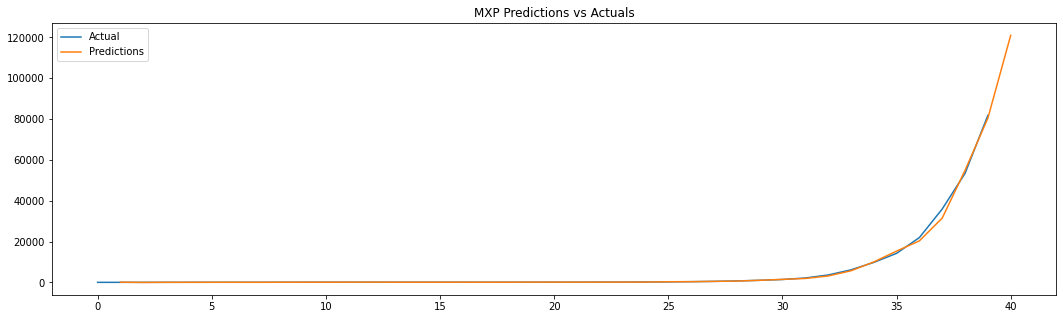

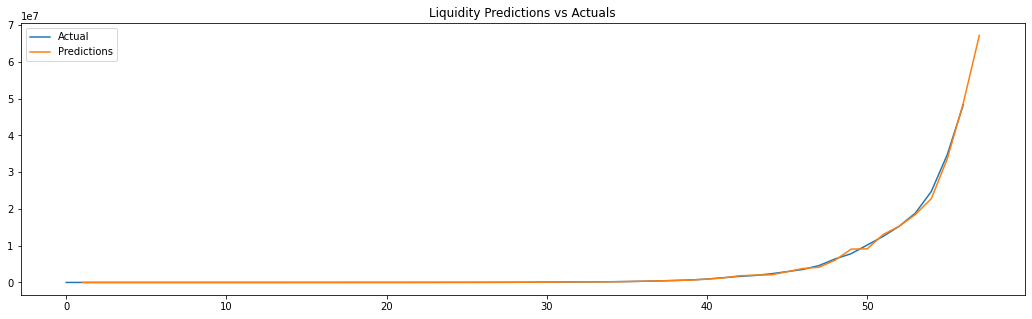

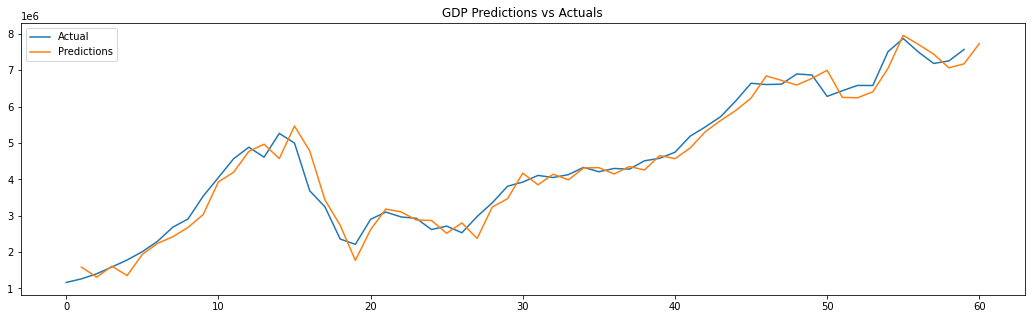

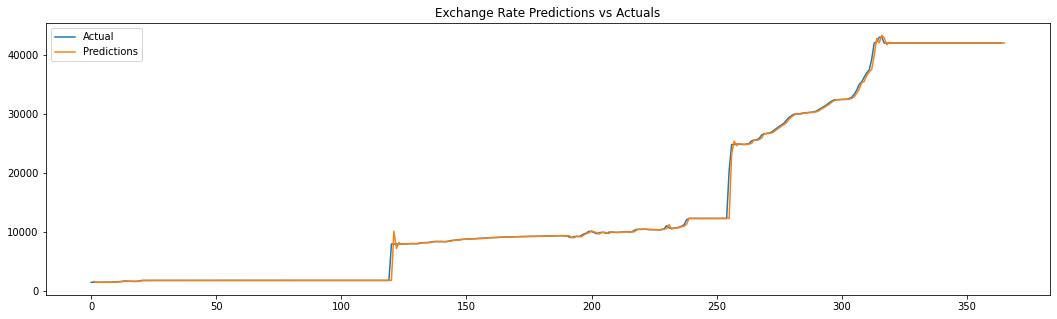

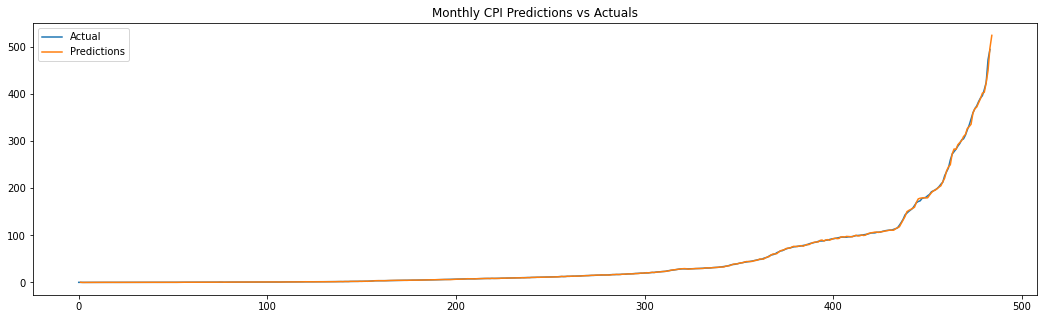

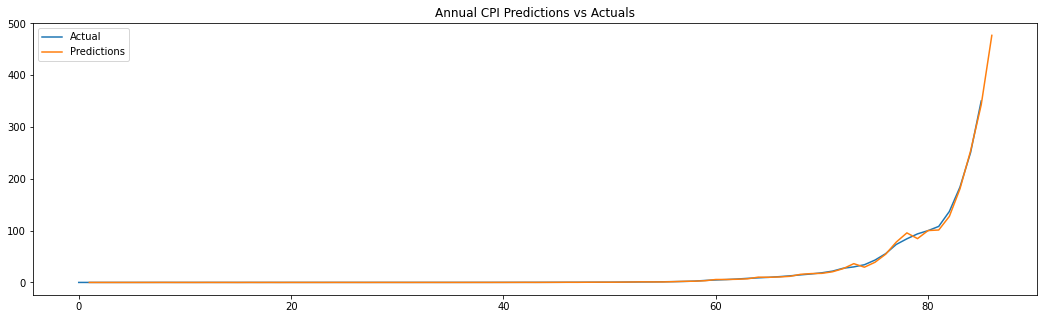

In [ ]:
plot_predictions("MXP", seasonal_mxp_df["MXP"], seasonal_mxp_model, forecasts=1)
plot_predictions("Liquidity", liquidity_df["liquidity"], liquidity_model, forecasts=1)
plot_predictions("GDP", gdp_df["GDP"], gdp_model, forecasts=1)
plot_predictions("Exchange Rate", exchange_rate_df["USD"], exchange_rate_model, forecasts=1)
plot_predictions("Monthly CPI", monthly_cpi_df["monthly CPI"], monthly_cpi_model, forecasts=1)
plot_predictions("Annual CPI", annual_cpi_df["annual CPI"], annual_cpi_model, forecasts=1)

## Summarize Forecasts

In [ ]:
def summarize_forecasts(fitted_model, dataset, nround=1):
  nhead, ntail = 3, 3

  print(dataset.head(nhead))
  print(".\n.\n.")
  print(dataset.tail(ntail).to_string(header=False))

  print(
      "\nForecast for next time step: \033[1m{value}\033[0m{end}"
      .format(
          value=round(fitted_model.forecast().values[0], nround),
          end=f"\n{'='*150}",
      )
  )

In [ ]:
summarize_forecasts(seasonal_mxp_model, seasonal_mxp_df)
summarize_forecasts(liquidity_model, liquidity_df)
summarize_forecasts(gdp_model, gdp_df.drop('GDP growth', axis=1), nround=0)
summarize_forecasts(exchange_rate_model, exchange_rate_df, nround=6)
summarize_forecasts(monthly_cpi_model, monthly_cpi_df)
summarize_forecasts(annual_cpi_model, annual_cpi_df, nround=4)

     season   MXP
0  1/1/1391  25.7
1  4/1/1391  28.1
2  7/1/1391  32.5
.
.
.
37   4/1/1400  35931.7
38   7/1/1400  53381.0
39  10/1/1400  81791.9

Forecast for next time step: 120965.1
   year  liquidity
0  1344      105.6
1  1345      120.8
2  1346      144.3
.
.
.
54  1398  24721500.0
55  1399  34761700.0
56  1400  48324400.0

Forecast for next time step: 67201584.6
   year      GDP
0  1341  1165380
1  1342  1263310
2  1343  1404074
.
.
.
57  1398  7183703
58  1399  7254000
59  1400  7569000

Forecast for next time step: 7730842.0
         date          USD
0  01/01/1371  1439.000000
1  02/01/1371  1447.880000
2  03/01/1371  1440.043478
.
.
.
362  03/01/1401  42000.0
363  04/01/1401  42000.0
364  05/01/1401  42000.0

Forecast for next time step: 42000.0
       date  monthly CPI
0  1/1/1361          0.3
1  2/1/1361          0.2
2  3/1/1361          0.2
.
.
.
481  2/1/1401  424.4
482  3/1/1401  473.2
483  4/1/1401  494.7

Forecast for next time step: 524.7
   year  annual CPI
0  1315 

# Create Feature-Label Datasets
So far, we have analyzed each of the time series separately. Now it't time to group them as features with a label of the CPI index at the corresponding time ranges. Datasets have different time range and time steps so we are going to create three new datasets with unified time range and time steps as follows. Then we can do some feature selection and make use of these datasets.


*   **MXP-Echange Rate-CPI** (seasonal from 1/1/1391 to 10/1/1400)
*   **Liquidity-GDP-CPI** (annual from 1344 to 1400)
*   **MXP-Liquidity-GDP-Exchange Rate-CPI** (annual from 1391 to 1400)



## Create Datasets

In [ ]:
# concatenating MXP, exchange rate, and monthly CPI
exch_rate_in_range = exchange_rate_df["USD"][-125:-5].reset_index(drop=True)
exch_rate_seasonal_avg = pd.Series(
    [np.mean(exch_rate_in_range[3*i:3*(i+1)]) for i in range(40)],
    name="USD",
)

cpi_in_range = monthly_cpi_df["monthly CPI"][360:480].reset_index(drop=True)
cpi_seasonal_avg = pd.Series(
    [np.mean(cpi_in_range[3*i:3*(i+1)]) for i in range(40)],
    name="monthly CPI",
)

mxp_exch_cpi_df = pd.concat(
    [
        seasonal_mxp_df,
        exch_rate_seasonal_avg,
        cpi_seasonal_avg,
    ],
    axis=1,
)

mxp_exch_cpi_df.head()

,season,MXP,USD,monthly CPI
0,1/1/1391,25.7,12260.0,48.866667
1,4/1/1391,28.1,12260.0,52.433333
2,7/1/1391,32.5,12260.0,57.900000
3,10/1/1391,46.4,12260.0,62.833333
4,1/1/1392,51.2,12260.0,68.100000


In [ ]:
# concatenating liquidity, GDP, and annual CPI
liq_gdp_cpi_df = pd.concat(
    [
        liquidity_df,
        gdp_df["GDP"][-57:].reset_index(drop=True),
        annual_cpi_df["annual CPI"][-57:].reset_index(drop=True),
    ],
    axis=1,
)

liq_gdp_cpi_df.head()

,year,liquidity,GDP,annual CPI
0,1344,105.6,1590779,0.0533
1,1345,120.8,1782032,0.0533
2,1346,144.3,2010389,0.0533
3,1347,175.3,2296959,0.0533
4,1348,205.7,2683584,0.0533


In [ ]:
# all in one using annual CPI for the last 10 years
exch_rate_in_range = exchange_rate_df["USD"][-125:-5].reset_index(drop=True)
exch_rate_annual_avg = pd.Series(
    [np.mean(exch_rate_in_range[12*i:12*(i+1)]) for i in range(10)],
    name="USD",
)

mxp_in_range = seasonal_mxp_df["MXP"][-40:].reset_index(drop=True)
mxp_annual_avg = pd.Series(
    [np.mean(mxp_in_range[4*i:4*(i+1)]) for i in range(10)],
    name="MXP",
)

general_cpi_df = pd.concat(
    [
        liquidity_df[-10:].reset_index(drop=True),
        gdp_df["GDP"][-10:].reset_index(drop=True),
        mxp_annual_avg,
        exch_rate_annual_avg,
        annual_cpi_df["annual CPI"][-10:].reset_index(drop=True),
    ],
    axis=1,
)

general_cpi_df.head()

,year,liquidity,GDP,MXP,USD,annual CPI
0,1391,4606935.9,6279352,33.175,12260.000000,55.5046
1,1392,6395504.8,6434376,60.575,21320.991494,73.3066
2,1393,7823847.9,6580553,91.450,26522.743894,84.1748
3,1394,10172800.0,6577287,102.925,29589.629795,93.6757
4,1395,12533900.0,7508814,100.000,31400.884677,100.0000


## Visualize Datesets

In [ ]:
import seaborn as sns

### MXP-Exchange Rate-CPI (Seasonal)

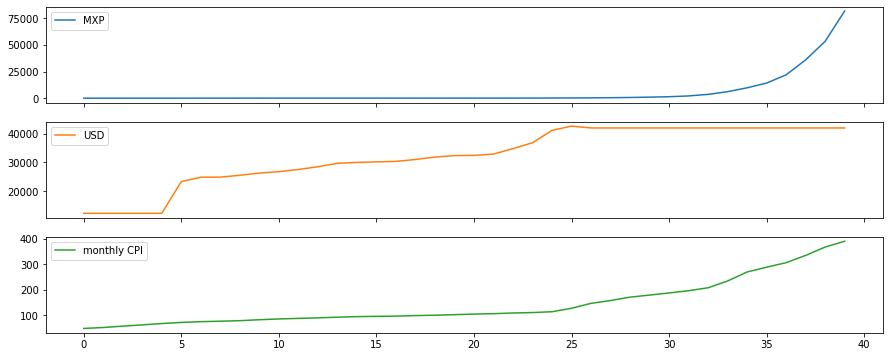

In [ ]:
mxp_exch_cpi_df.plot(subplots=True, figsize=(15, 6))
plt.show()

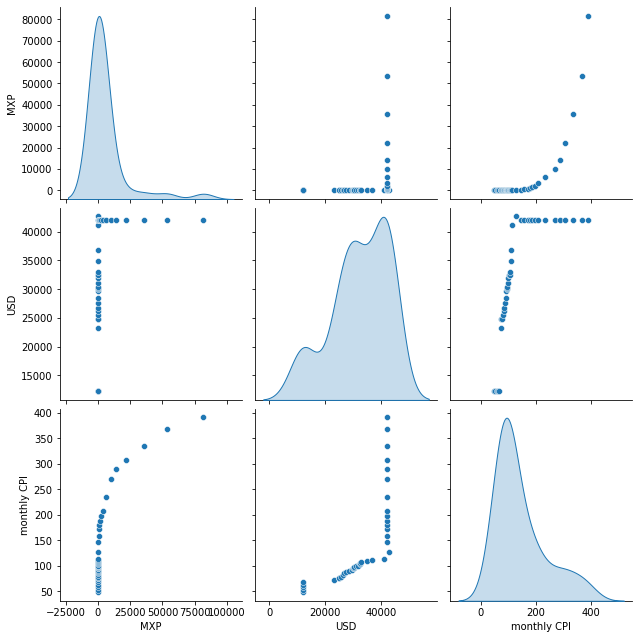

In [ ]:
sns.pairplot(mxp_exch_cpi_df.drop('season', axis=1),  height=3, diag_kind='kde')
plt.show()

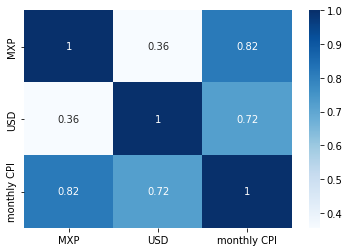

In [ ]:
sns.heatmap(mxp_exch_cpi_df.drop('season', axis=1).corr(), cmap='Blues', annot=True)
plt.show()

### Liqiudity-GDP-CPI (Annual)

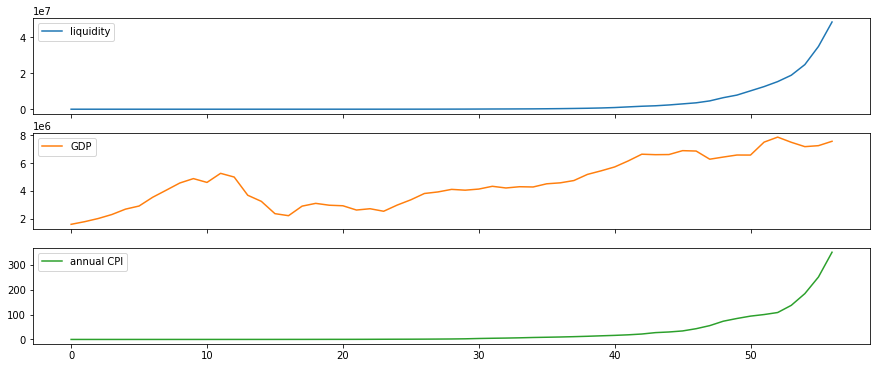

In [ ]:
liq_gdp_cpi_df.drop(columns=["year"]).plot(subplots=True, figsize=(15, 6))
plt.show()

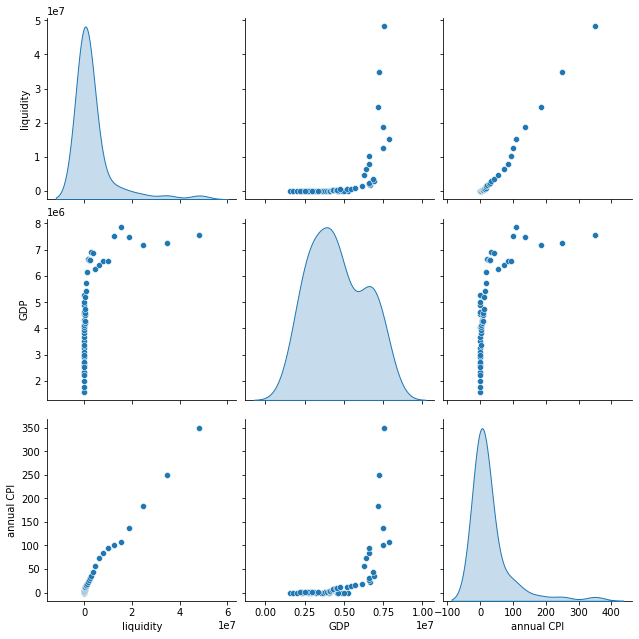

In [ ]:
sns.pairplot(liq_gdp_cpi_df.drop('year', axis=1),  height=3, diag_kind='kde')
plt.show()

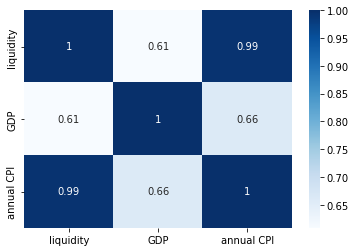

In [ ]:
sns.heatmap(liq_gdp_cpi_df.drop('year', axis=1).corr(), cmap='Blues', annot=True)
plt.show()

### Liquidity-GDP-MXP-Exchange Rate-CPI (Annual)

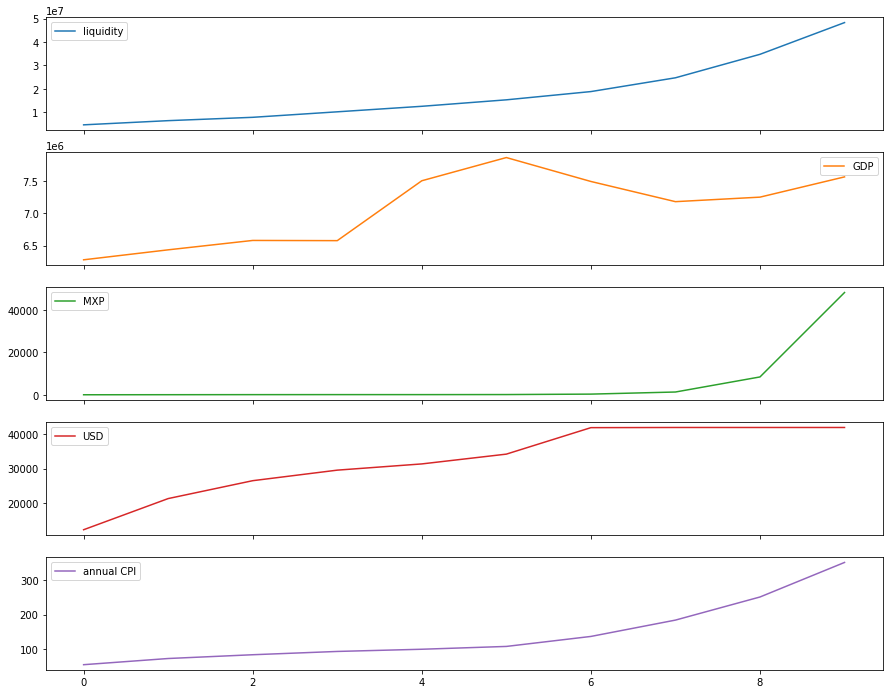

In [ ]:
general_cpi_df.drop('year', axis=1).plot(subplots=True, figsize=(15, 12))
plt.show()

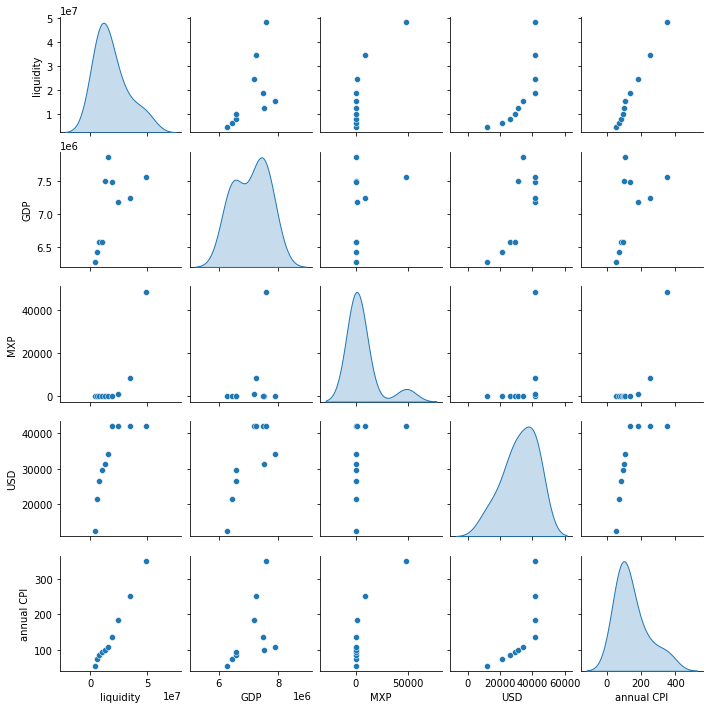

In [ ]:
sns.pairplot(general_cpi_df.drop('year', axis=1),  height=2, diag_kind='kde')
plt.show()

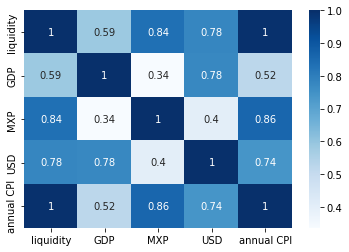

In [ ]:
sns.heatmap(general_cpi_df.drop('year', axis=1).corr(), cmap='Blues', annot=True)
plt.show()

# Linear Regression Models
In this section we are going to build linear regression models that learn to estimate CPI based on the economic parameters. In other words, these models will be trained on the historical values for the economic features and used on their predicted values in the future to make predictions for the CPI measure at those time steps.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [ ]:
def evaluate_model(model, X, y):
  score = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
  print(f"MAE: {-score.mean():.2f}")

In [ ]:
def build_and_fit_model(X, y):
  cv = RepeatedKFold(n_splits=9, n_repeats=3, random_state=1)
  model = linear_model.LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)
  model.fit(X, y)

  return model

In [ ]:
def make_forecasts(model, prediction_x):
  predicted_y = model.predict(prediction_x)
  y_1401 = np.mean(predicted_y[0])
  y_1402 = np.mean(predicted_y[1])

  print(f"CPI forecast for the year 1401 is {y_1401}")
  print(f"CPI forecast for the year 1402 is {y_1402}")

## Liquidity-GDP-CPI

In [ ]:
# Create train data.
X = np.vstack((
    liq_gdp_cpi_df["liquidity"].to_numpy(),
    liq_gdp_cpi_df["GDP"].to_numpy(),
)).T

y = liq_gdp_cpi_df["annual CPI"].to_numpy()

In [ ]:
# Get features for the next two timesteps for predictions.
prediction_x = np.vstack((
    liquidity_model.forecast(2).to_numpy(),
    gdp_model.forecast(2).to_numpy(),
)).T

In [ ]:
# Create and fit the model.
model = build_and_fit_model(X, y)

In [ ]:
# Evaluate the model using 10-fold cross val
evaluate_model(model, X, y)

MAE: 7.58


In [ ]:
# Make predictions for the next two timesteps.
make_forecasts(model,  prediction_x)

CPI forecast for the year 1401 is 478.35802402890295
CPI forecast for the year 1402 is 641.5557273675348


## MXP-Liquidity-CPI

In [ ]:
# Create train data.
X = np.vstack((
    general_cpi_df["liquidity"].to_numpy(),
    general_cpi_df["MXP"].to_numpy(),
)).T

y = general_cpi_df["annual CPI"].to_numpy()

In [ ]:
# Get average MXP for next two years.
mxp_predic_x = seasonal_mxp_model.forecast(8).to_numpy()
mxp_predic_x_avg = np.array([np.mean(mxp_predic_x[4*i:4*(i+1)]) for i in range(2)])

In [ ]:
# Get features for the next two timesteps for predictions.
prediction_x = np.vstack((
    liquidity_model.forecast(2).to_numpy(),
    mxp_predic_x_avg,
)).T

In [ ]:
# Create and fit the model.
model = build_and_fit_model(X, y)

In [ ]:
# Evaluate the model using 10-fold cross val
evaluate_model(model, X, y)

MAE: 16.07


In [ ]:
# Make predictions for the next two timesteps.
make_forecasts(model,  prediction_x)

CPI forecast for the year 1401 is 567.8796884276298
CPI forecast for the year 1402 is 992.4643459160177


## MXP-Liquidity-GDP-CPI

In [ ]:
# Create train data.
X = np.vstack((
    general_cpi_df["liquidity"].to_numpy(),
    general_cpi_df["GDP"].to_numpy(),
    general_cpi_df["MXP"].to_numpy(),
)).T

y = general_cpi_df["annual CPI"].to_numpy()

In [ ]:
# Get features for the next two timesteps for predictions.
prediction_x = np.vstack((
    liquidity_model.forecast(2).to_numpy(),
    gdp_model.forecast(2).to_numpy(),
    mxp_predic_x_avg,
)).T

In [ ]:
# Create and fit the model.
model = build_and_fit_model(X, y)

In [ ]:
# Evaluate the model using 10-fold cross val
evaluate_model(model, X, y)

MAE: 3.92


In [ ]:
# Make predictions for the next two timesteps.
make_forecasts(model,  prediction_x)

CPI forecast for the year 1401 is 530.1737640037142
CPI forecast for the year 1402 is 840.2517935297424


## All Features

In [ ]:
# Create train data.
X = np.vstack((
    general_cpi_df["liquidity"].to_numpy(),
    general_cpi_df["GDP"].to_numpy(),
    general_cpi_df["MXP"].to_numpy(),
    general_cpi_df["USD"].to_numpy(),
)).T

y = general_cpi_df["annual CPI"].to_numpy()

In [ ]:
# Get average exchange rate for next 2 years (from both its forecast and actual values)
exch_predict_x = np.append(exchange_rate_df["USD"][-5:], exchange_rate_model.forecast(19).to_numpy())
exch_predict_x_avg = np.array([np.mean(exch_predict_x[12*i:12*(i+1)]) for i in range(2)])

In [ ]:
# Get features for the next two timesteps for predictions.
prediction_x = np.vstack((
    liquidity_model.forecast(2).to_numpy(),
    gdp_model.forecast(2).to_numpy(),
    exch_predict_x_avg,
    mxp_predic_x_avg,
)).T

In [ ]:
# Create and fit the model.
model = build_and_fit_model(X, y)

In [ ]:
# Evaluate the model using 10-fold cross val
evaluate_model(model, X, y)

MAE: 8.85


In [ ]:
# Make predictions for the next two timesteps.
make_forecasts(model,  prediction_x)

CPI forecast for the year 1401 is 538.114576715466
CPI forecast for the year 1402 is 881.6662276037252
